<a href="https://colab.research.google.com/github/vishalmysore/AI/blob/main/examples/images/image_QA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [5]:
from transformers import ViltProcessor
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

In [6]:
from transformers import ViltForQuestionAnswering
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")


In [7]:
def cookGPT(image,text):
  encoding = processor(image, text, return_tensors="pt")
  # forward pass
  outputs = model(**encoding)
  logits = outputs.logits
  idx = logits.argmax(-1).item()
  print("Predicted answer:", model.config.id2label[idx])
  return model.config.id2label[idx]

In [8]:
import torch
import torch.nn.functional as F

def get_all_answers_with_probabilities(image, text):
    # Encoding
    encoding = processor(image, text, return_tensors="pt")

    # Forward pass
    outputs = model(**encoding)
    logits = outputs.logits

    # Apply softmax to get probabilities
    probabilities = F.softmax(logits, dim=-1)

    # Get all answers with probabilities
    answer_probabilities = [
        {"answer": model.config.id2label[i], "probability": probabilities[0, i].item()}
        for i in range(probabilities.size(-1))
    ]

    # Sort answers by probability in descending order
    sorted_answers = sorted(answer_probabilities, key=lambda x: x["probability"], reverse=True)

    return sorted_answers

# Example usage

#sorted_answers = get_all_answers_with_probabilities(image, text)
#print(sorted_answers)


In [16]:
import torch
import torch.nn.functional as F

def get_top_answers_csv(image, text, top_k=4):
    # Encoding
    encoding = processor(image, text, return_tensors="pt")

    # Forward pass
    outputs = model(**encoding)
    logits = outputs.logits

    # Apply softmax to get probabilities
    probabilities = F.softmax(logits, dim=-1)

    # Get all answers with probabilities
    answer_probabilities = [
        {"answer": model.config.id2label[i], "probability": probabilities[0, i].item()}
        for i in range(probabilities.size(-1))
    ]

    # Sort answers by probability in descending order
    sorted_answers = sorted(answer_probabilities, key=lambda x: x["probability"], reverse=True)

    # Extract top k answers as a comma-separated string
    top_answers_csv = ",".join(answer["answer"] for answer in sorted_answers[:top_k])

    return top_answers_csv


In [8]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 10.5 M

In [18]:
!wget https://github.com/vishalmysore/AI/blob/main/data/img/vishal_veg1.jpg

--2024-01-17 23:20:59--  https://github.com/vishalmysore/AI/blob/main/data/img/vishal_veg1.jpg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5104 (5.0K) [text/plain]
Saving to: ‘vishal_veg1.jpg’

vishal_veg1.jpg     100%[===================>]   4.98K  --.-KB/s    in 0s      

2024-01-17 23:20:59 (81.4 MB/s) - ‘vishal_veg1.jpg’ saved [5104/5104]



In [17]:
import gradio as gr
cookGPTGradio = gr.Interface(fn=get_top_answers_csv,
                    inputs=[
                        gr.Image(label="Select Image", type="pil"),
                        gr.Textbox(label="Question",value="what vegetables are there in my hand"),
                           ],
                    outputs=[gr.Textbox(label="Suggestion")],
                    title="CookGPT for food suggestion",
                    description="cooking made easy",
                    allow_flagging="never")
cookGPTGradio.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://60c4ea2184fc34b79a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


======================================================================================

The code this point was used to generate images for the above example, you can use this to generate new images

In [19]:
! pip install --upgrade \
  diffusers \
  transformers \
  safetensors \
  sentencepiece \
  accelerate \
  bitsandbytes \
  torch \
  huggingface_hub --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [20]:
from diffusers import DiffusionPipeline
import torch

# load both base & refiner
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16,  use_safetensors=True
)
base.to("cuda")
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

# Define how many steps and what % of steps to be run on each experts (80/20) here
n_steps = 40
high_noise_frac = 0.8



model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

ImportError: Using `low_cpu_mem_usage=True` or a `device_map` requires Accelerate: `pip install accelerate`

In [ ]:
def generate_image(prompt):
  # run both experts
  image = base(
      prompt=prompt,
      num_inference_steps=n_steps,
      denoising_end=high_noise_frac,
      output_type="latent",
  ).images
  image = refiner(
      prompt=prompt,
      num_inference_steps=n_steps,
      denoising_start=high_noise_frac,
      image=image,
  ).images[0]
  return image


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

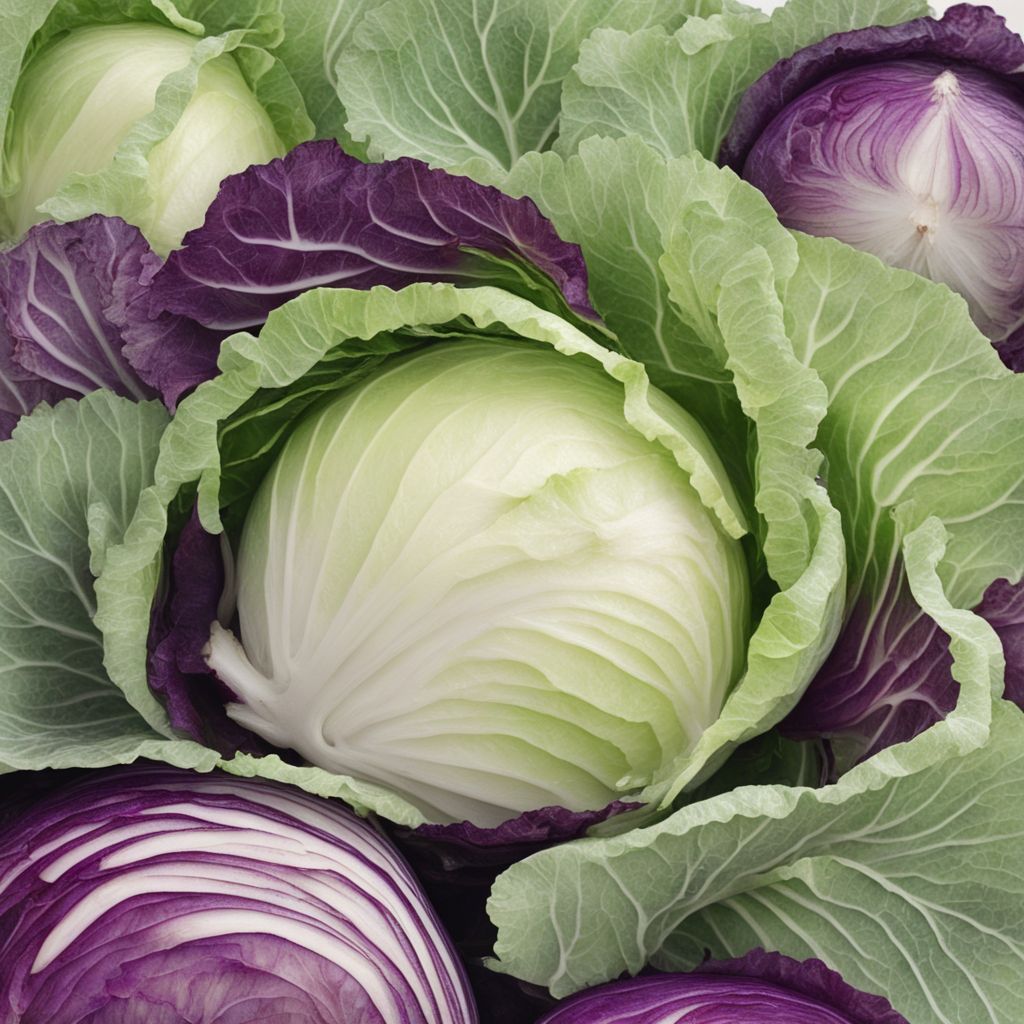

In [ ]:
prompt = "cabbage and onion"
img = generate_image(prompt)
img